In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

def animar_e_salvar_mp4(caminho_arquivo_entrada):
    """
    Lê os dados da simulação Sol-Terra-Júpiter, gera animação e salva como MP4.
    """

    # ========= 1. Caminhos e arquivos =========
    caminho_absoluto = os.path.abspath(caminho_arquivo_entrada)
    pasta_do_arquivo = os.path.dirname(caminho_absoluto)
    nome_base = os.path.splitext(os.path.basename(caminho_absoluto))[0]
    caminho_saida = os.path.join(pasta_do_arquivo, f"{nome_base}.mp4")

    print(f"Lendo dados de: {caminho_absoluto}")

    # ========= 2. Carregar dados =========
    try:
        data = np.loadtxt(caminho_absoluto, delimiter=',')
    except OSError:
        print(f"Erro: Arquivo não encontrado em {caminho_absoluto}")
        return

    tempo = data[:, 0]
    x_t = data[:, 1]
    y_t = data[:, 2]
    x_j = data[:, 3]
    y_j = data[:, 4]

    # ========= 3. Configurar gráfico =========
    fig, ax = plt.subplots(figsize=(8, 8))

    limite = 6.5  # Júpiter chega em 5.2 UA
    ax.set_xlim(-limite, limite)
    ax.set_ylim(-limite, limite)

    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

    ax.set_xlabel('X (UA)')
    ax.set_ylabel('Y (UA)')
    ax.set_title(f'Simulação: {nome_base}')

    # Sol
    ax.plot(0, 0, 'yo', markersize=12, label='Sol')

    # Terra
    terra, = ax.plot([], [], 'bo', markersize=5, label='Terra')
    rastro_t, = ax.plot([], [], 'b-', linewidth=1, alpha=0.5)

    # Júpiter
    jupiter, = ax.plot([], [], 'ro', markersize=7, label='Júpiter')
    rastro_j, = ax.plot([], [], 'r-', linewidth=1, alpha=0.5)

    texto_tempo = ax.text(0.05, 0.95, '', transform=ax.transAxes)

    ax.legend(loc='upper right')

    # ========= 4. Frames =========
    passo_frame = 10
    frames = range(0, len(tempo), passo_frame)

    def init():
        terra.set_data([], [])
        jupiter.set_data([], [])
        rastro_t.set_data([], [])
        rastro_j.set_data([], [])
        texto_tempo.set_text('')
        return terra, jupiter, rastro_t, rastro_j, texto_tempo

    def update(i):
        # Terra
        terra.set_data([x_t[i]], [y_t[i]])
        rastro_t.set_data(x_t[:i], y_t[:i])

        # Júpiter
        jupiter.set_data([x_j[i]], [y_j[i]])
        rastro_j.set_data(x_j[:i], y_j[:i])

        texto_tempo.set_text(f"Tempo: {tempo[i]:.2f} anos")

        return terra, jupiter, rastro_t, rastro_j, texto_tempo

    anim = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

    # ========= 5. Salvar vídeo =========
    print("Gerando vídeo...")
    writer = FFMpegWriter(fps=30, metadata=dict(artist="SimulacaoPython"), bitrate=1800)

    try:
        anim.save(caminho_saida, writer=writer)
        print(f"Vídeo salvo em: {caminho_saida}")
    except Exception as e:
        print(f"Erro ao salvar vídeo: {e}")

    plt.close(fig)

# ----- Execução -----
if __name__ == "__main__":
    animar_e_salvar_mp4("saida.txt")


Lendo dados de: /home/joliveira/Documents/IntroFiscomp2025/Projeto-5/tarefa-B/saida.txt
Gerando vídeo...
Vídeo salvo em: /home/joliveira/Documents/IntroFiscomp2025/Projeto-5/tarefa-B/saida.mp4


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import os

def animar_calc2(arquivo_entrada_1, arquivo_entrada_2, nome_video_saida='animacao_sistema.mp4'):
    """
    Gera uma animação lendo dois arquivos de dados de uma simulação gravitacional.
    
    Parâmetros:
      arquivo_entrada_1: Nome/caminho do arquivo com dados de Júpiter e Asteroide 1.
      arquivo_entrada_2: Nome/caminho do arquivo com dados dos Asteroides 2 e 3.
      nome_video_saida:  Nome do arquivo .mp4 que será gerado.
    """

    # --- 1. Verificação e Carregamento ---
    print(f"Buscando arquivos: '{arquivo_entrada_1}' e '{arquivo_entrada_2}'...")

    if not os.path.exists(arquivo_entrada_1) or not os.path.exists(arquivo_entrada_2):
        print("Erro: Um ou ambos os arquivos de entrada não foram encontrados.")
        return

    try:
        # Carrega os arquivos passados como argumento
        # [cite_start]Arquivo 1: t, xj, yj, xa1, ya1 [cite: 16]
        data1 = np.loadtxt(arquivo_entrada_1, delimiter=',')
        
        # [cite_start]Arquivo 2: t, xa2, ya2, xa3, ya3 [cite: 16]
        data2 = np.loadtxt(arquivo_entrada_2, delimiter=',')
        
        print("Dados carregados com sucesso.")
        
    except Exception as e:
        print(f"Erro ao ler o conteúdo dos arquivos: {e}")
        return

    # Extração das colunas para facilitar o uso
    tempo = data1[:, 0]
    
    # Estrutura de dados dos corpos
    # Nota: Assumindo que o Fortran gerou as colunas nesta ordem específica
    corpos = {
        'Júpiter':      {'x': data1[:, 1], 'y': data1[:, 2], 'cor': 'orange', 'tam': 9},
        'Asteroide I':  {'x': data1[:, 3], 'y': data1[:, 4], 'cor': 'cyan',   'tam': 3},
        'Asteroide II': {'x': data2[:, 1], 'y': data2[:, 2], 'cor': 'white',  'tam': 3},
        'Asteroide III':{'x': data2[:, 3], 'y': data2[:, 4], 'cor': 'magenta','tam': 3}
    }

    # --- 2. Configuração do Gráfico ---
    fig, ax = plt.subplots(figsize=(9, 9))
    
    # Ajuste dos limites do gráfico
    limite = 6.5
    ax.set_xlim(-limite, limite)
    ax.set_ylim(-limite, limite)
    ax.set_aspect('equal')
    
    # Estilização "espacial"
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')
    ax.grid(True, linestyle=':', alpha=0.2, color='white')
    
    # Rótulos e Título
    ax.set_xlabel('X (UA)', color='white')
    ax.set_ylabel('Y (UA)', color='white')
    ax.set_title(f'Simulação de N-Corpos', color='white')
    
    # Ajusta as cores dos eixos para branco
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

    # Sol no centro (estático)
    ax.plot(0, 0, 'o', color='yellow', markersize=14, label='Sol', zorder=10)

    # Inicialização dos objetos gráficos (linhas de rastro e pontos)
    linhas = {}
    pontos = {}
    
    for nome, props in corpos.items():
        # Linha de rastro
        ln, = ax.plot([], [], color=props['cor'], linewidth=0.7, alpha=0.5)
        linhas[nome] = ln
        
        # Ponto do corpo
        pt, = ax.plot([], [], 'o', color=props['cor'], markersize=props['tam'], label=nome)
        pontos[nome] = pt

    # Texto indicador de tempo
    txt_tempo = ax.text(0.02, 0.95, '', transform=ax.transAxes, color='white', fontsize=10)
    
    # Legenda
    ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')

    # --- 3. Animação ---
    
    # Otimização: pular frames para o vídeo não ficar gigante/lento
    skip = 20 
    indices = range(0, len(tempo), skip)

    def init():
        for nome in corpos:
            pontos[nome].set_data([], [])
            linhas[nome].set_data([], [])
        txt_tempo.set_text('')
        return list(pontos.values()) + list(linhas.values()) + [txt_tempo]

    def update(frame):
        # frame é o índice da linha na matriz de dados
        
        for nome in corpos:
            # Pega as arrays de posição completa
            arr_x = corpos[nome]['x']
            arr_y = corpos[nome]['y']
            
            # Posição atual
            pontos[nome].set_data([arr_x[frame]], [arr_y[frame]])
            
            # Rastro (do início até o frame atual)
            # Para não pesar, desenhamos apenas os últimos 300 pontos do rastro se quiser otimizar
            # Aqui desenhamos tudo:
            linhas[nome].set_data(arr_x[:frame], arr_y[:frame])
            
        txt_tempo.set_text(f'Tempo: {tempo[frame]:.2f} anos')
        
        return list(pontos.values()) + list(linhas.values()) + [txt_tempo]

    # Cria o objeto de animação
    print("Gerando frames da animação...")
    anim = FuncAnimation(fig, update, frames=indices, init_func=init, blit=True)

    # --- 4. Salvamento ---
    print(f"Salvando arquivo de vídeo: {nome_video_saida}")
    
    try:
        writer = FFMpegWriter(fps=30, bitrate=2000)
        anim.save(nome_video_saida, writer=writer)
        print("Concluído com sucesso!")
    except Exception as e:
        print(f"Erro ao salvar vídeo: {e}")
        print("Verifique se o FFMPEG está instalado no sistema.")

    plt.close(fig)

# --- Exemplo de como chamar a função ---
if __name__ == "__main__":
    # Agora você passa os nomes dos arquivos aqui:
    arq1 = 'asteroides_saida.txt'
    arq2 = 'asteroides_saida_2.txt'
    
    animar_calc2(arq1, arq2, 'simulacao_jupiter_asteroides.mp4')

Buscando arquivos: 'asteroides_saida.txt' e 'asteroides_saida_2.txt'...
Dados carregados com sucesso.
Gerando frames da animação...
Salvando arquivo de vídeo: simulacao_jupiter_asteroides.mp4
Concluído com sucesso!


Lendo arquivos: 'asteroides_saida.txt' e 'asteroides_saida_2.txt'...
Gráfico salvo: orbitas_completo.png


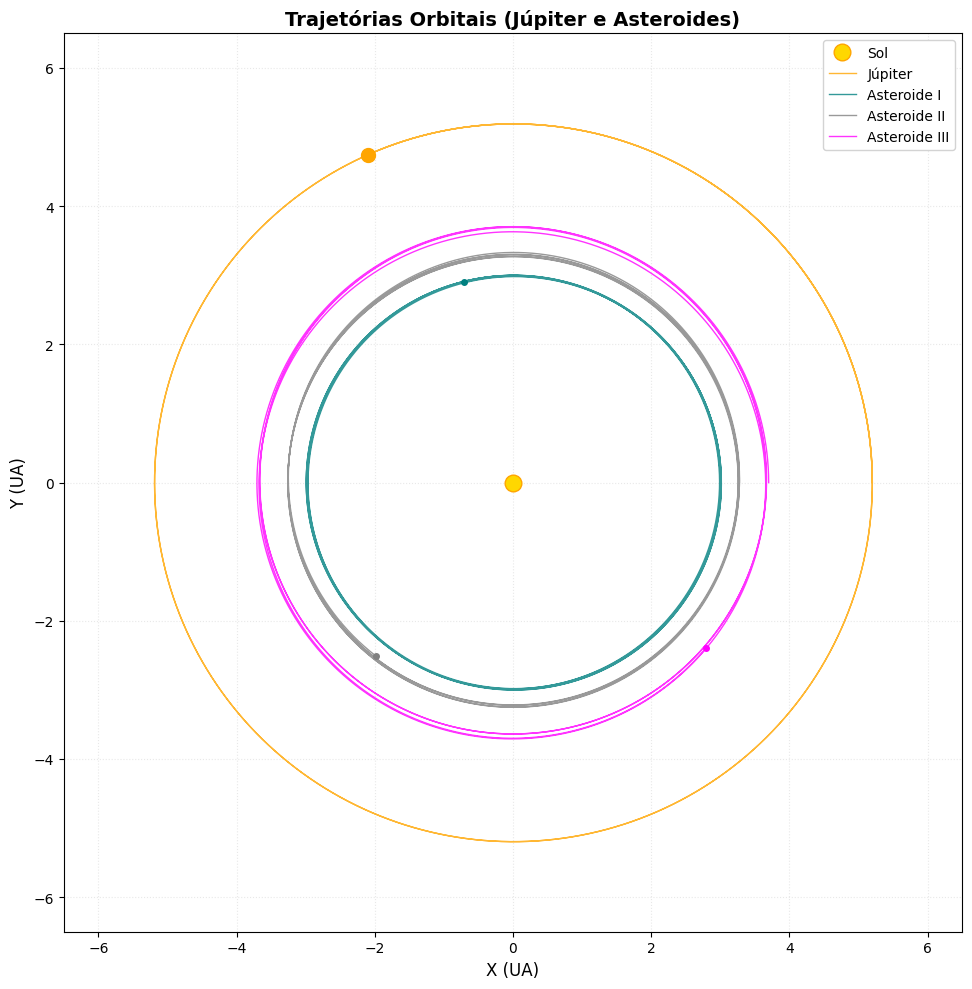

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plotar_orbitas_final(arquivo_entrada_1, arquivo_entrada_2, nome_imagem_saida='orbitas_completo.png'):
    """
    Gera um gráfico estático das órbitas com fundo branco.
    Inclui marcadores finais para TODOS os corpos (incluindo Júpiter).
    """

    # --- 1. Verificação e Carregamento ---
    print(f"Lendo arquivos: '{arquivo_entrada_1}' e '{arquivo_entrada_2}'...")

    if not os.path.exists(arquivo_entrada_1) or not os.path.exists(arquivo_entrada_2):
        print("Erro: Arquivos de entrada não encontrados.")
        return

    try:
        data1 = np.loadtxt(arquivo_entrada_1, delimiter=',')
        data2 = np.loadtxt(arquivo_entrada_2, delimiter=',')
    except Exception as e:
        print(f"Erro ao ler arquivos: {e}")
        return

    # --- Estrutura de Dados ---
    # Cores ajustadas para fundo branco (Teal e Gray para contraste)
    corpos = {
        'Júpiter':      {'x': data1[:, 1], 'y': data1[:, 2], 'cor': 'orange',  'tam': 10}, # Aumentei um pouco Júpiter
        'Asteroide I':  {'x': data1[:, 3], 'y': data1[:, 4], 'cor': 'teal',    'tam': 4},
        'Asteroide II': {'x': data2[:, 1], 'y': data2[:, 2], 'cor': 'gray',    'tam': 4},
        'Asteroide III':{'x': data2[:, 3], 'y': data2[:, 4], 'cor': 'magenta', 'tam': 4}
    }

    # --- 2. Configuração do Gráfico ---
    fig, ax = plt.subplots(figsize=(10, 10))

    # Estilo Fundo Branco
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.grid(True, linestyle=':', alpha=0.5, color='lightgray')

    # Rótulos e Título
    ax.set_xlabel('X (UA)', fontsize=12, color='black')
    ax.set_ylabel('Y (UA)', fontsize=12, color='black')
    ax.set_title('Trajetórias Orbitais (Júpiter e Asteroides)', fontsize=14, fontweight='bold', color='black')

    # Sol no centro
    ax.plot(0, 0, 'o', color='gold', markeredgecolor='orange', markersize=12, label='Sol', zorder=10)

    # --- 3. Plotagem ---
    for nome, props in corpos.items():
        # 1. Desenha a linha da órbita
        ax.plot(props['x'], props['y'], 
                color=props['cor'], 
                linewidth=1, 
                alpha=0.8, 
                label=nome)
        
        # 2. Desenha o marcador na posição final (Para TODOS agora)
        ax.plot(props['x'][-1], props['y'][-1], 
                'o', 
                color=props['cor'], 
                markersize=props['tam'])

    # Ajustes finais de escala
    limite = 6.5
    ax.set_xlim(-limite, limite)
    ax.set_ylim(-limite, limite)
    ax.set_aspect('equal')

    # Legenda
    ax.legend(loc='upper right', framealpha=1, edgecolor='lightgray')

    # --- 4. Salvar ---
    plt.tight_layout()
    plt.savefig(nome_imagem_saida, dpi=150)
    print(f"Gráfico salvo: {nome_imagem_saida}")
    plt.savefig("fig2.png")
    plt.show()

# --- Execução ---
if __name__ == "__main__":
    arq1 = 'asteroides_saida.txt'
    arq2 = 'asteroides_saida_2.txt'
    
    plotar_orbitas_final(arq1, arq2)

Lendo arquivo: saida_m_10000.txt


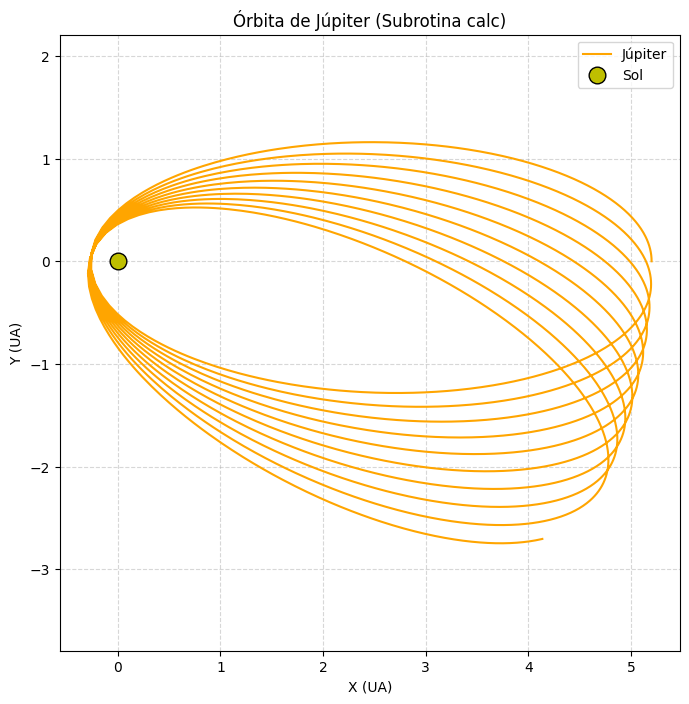

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plotar_orbita_jupiter(nome_arquivo='saida.txt'):
    """
    Lê o arquivo de saída da subrotina calc e plota a órbita de Júpiter.
    """
    print(f"Lendo arquivo: {nome_arquivo}")
    
    try:
        # Carrega os dados. O Fortran usa vírgula como delimitador
        dados = np.loadtxt(nome_arquivo, delimiter=',')
    except OSError:
        print(f"Erro: O arquivo '{nome_arquivo}' não foi encontrado.")
        print("Certifique-se de executar o código Fortran primeiro para gerar o arquivo.")
        return

    # Extrai as colunas de Júpiter.
    # Baseado no Fortran: write(1,2) dt*i, x_t(i), y_t(i), x_j(i), y_j(i) [cite: 8]
    # Índices: 0=tempo, 1=x_terra, 2=y_terra, 3=x_jupiter, 4=y_jupiter
    x_j = dados[:, 3]
    y_j = dados[:, 4]

    # Cria o gráfico
    plt.figure(figsize=(8, 8))
    
    # Plota a órbita
    plt.plot(x_j, y_j, label='Júpiter', color='orange')
    
    # Plota o Sol na origem (0,0) para referência
    plt.plot(0, 0, 'yo', markersize=12, label='Sol', markeredgecolor='black')

    # Configurações do gráfico
    plt.title('Órbita de Júpiter (Subrotina calc)')
    plt.xlabel('X (UA)')
    plt.ylabel('Y (UA)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.axis('equal') # Garante que a escala de X e Y seja a mesma

    # Mostra o gráfico
    massa = 10000
    plt.savefig(f"fig_m{massa}.png")
    plt.show()

if __name__ == "__main__":
    plotar_orbita_jupiter('saida_m_10000.txt')

Lendo e processando: saida_m_1.txt ...
Lendo e processando: saida_m_100.txt ...
Lendo e processando: saida_m_1000.txt ...
Lendo e processando: saida_m_10000.txt ...
Gerando gráfico...


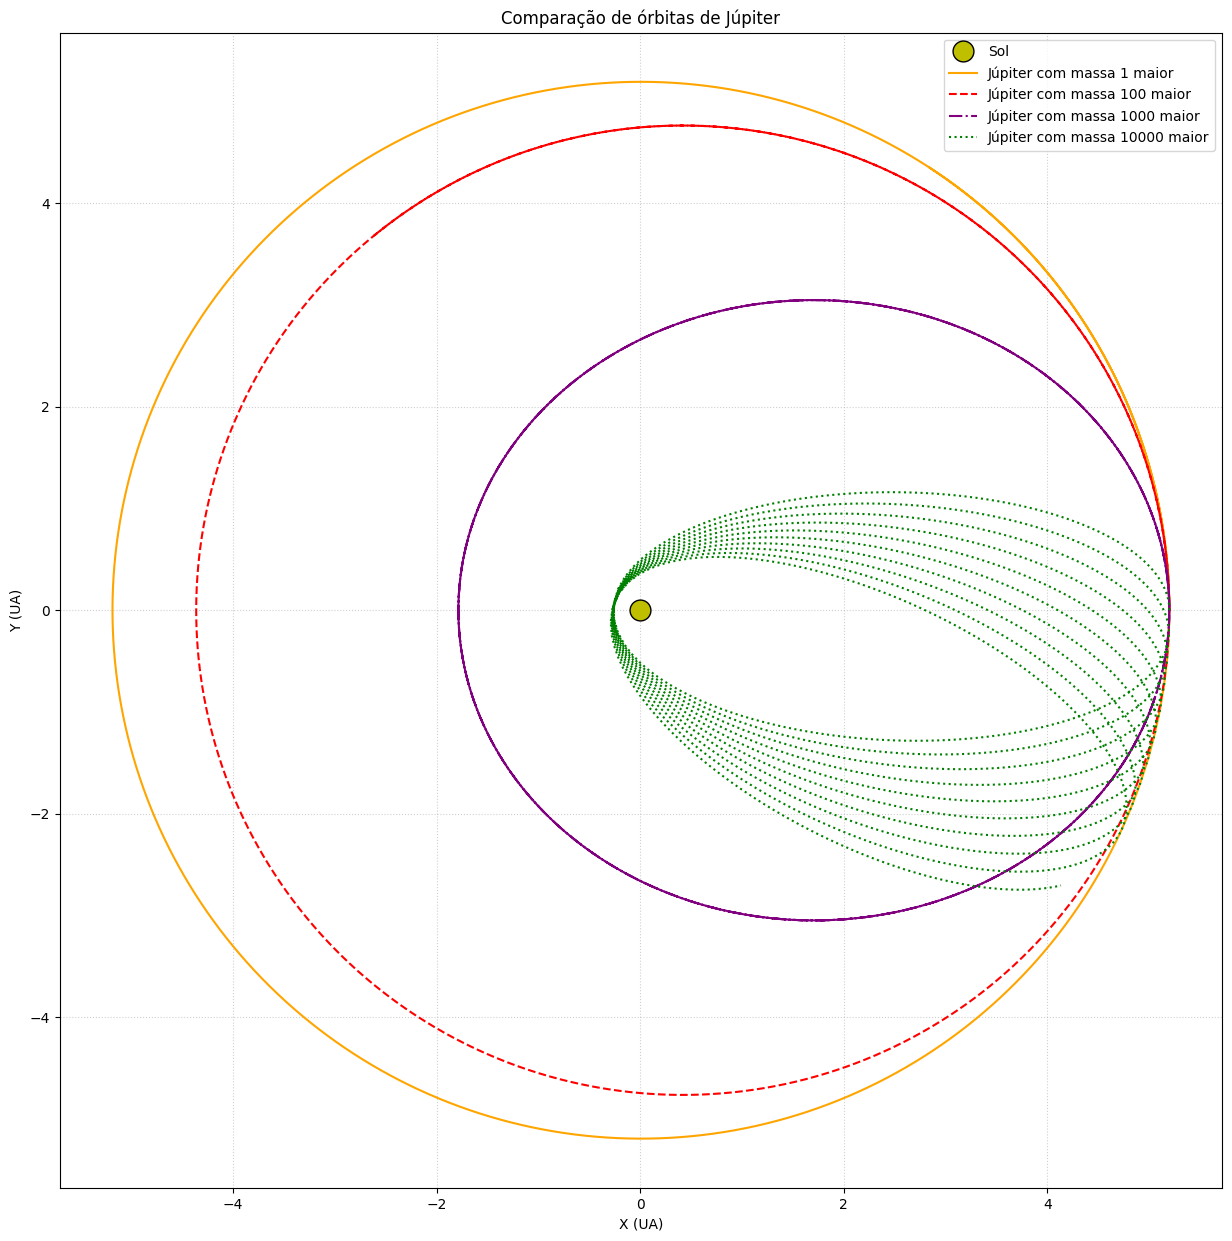

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re # Importa o módulo 're' para usar expressões regulares

def plotar_comparacao_massas(lista_arquivos):
    """
    Lê uma lista de arquivos de saída e plota as órbitas de Júpiter para comparação.
    
    Parâmetros:
      lista_arquivos: Lista com os nomes dos arquivos a serem processados.
    """
    
    # Lista de cores para diferenciar as órbitas automaticamente
    cores = ['orange', 'red', 'purple', 'green', 'blue', 'cyan']
    estilos = ['-', '--', '-.', ':', '-', '--']

    plt.figure(figsize=(15, 15))
    
    # Plota o Sol no centro
    plt.plot(0, 0, 'yo', markersize=15, label='Sol', markeredgecolor='black', zorder=10)

    arquivos_lidos = False

    for i, nome_arquivo in enumerate(lista_arquivos):
        
        cor_linha = cores[i % len(cores)]
        estilo_linha = estilos[i % len(estilos)]
        
        # --- Lógica de legenda atualizada ---
        
        # Expressão regular para encontrar "saida_m_" seguido por um número e ".txt"
        match = re.search(r'saida_m_(\d+)\.txt$', nome_arquivo)
        
        if match:
            # Se a correspondência for encontrada, extrai o número (grupo 1)
            fator_massa = match.group(1)
            legenda = f"Júpiter com massa {fator_massa} maior"
        else:
            # Se não corresponder ao padrão esperado, usa a legenda padrão
            legenda = f"Dados: {nome_arquivo}"
        
        # ------------------------------------

        if not os.path.exists(nome_arquivo):
            print(f"Aviso: O arquivo '{nome_arquivo}' não foi encontrado. Pulando...")
            continue

        print(f"Lendo e processando: {nome_arquivo} ...")
        
        try:
            # Lê dados no formato: t, x_terra, y_terra, x_jupiter, y_jupiter
            dados = np.loadtxt(nome_arquivo, delimiter=',')
            
            x_j = dados[:, 3]
            y_j = dados[:, 4]
            
            # Garante que a legenda é passada para a função plot
            plt.plot(x_j, y_j, label=legenda, color=cor_linha, linestyle=estilo_linha, linewidth=1.5)
            arquivos_lidos = True
            
        except Exception as e:
            print(f"Erro ao ler o arquivo {nome_arquivo}: {e}")

    if not arquivos_lidos:
        print("Nenhum arquivo válido foi processado.")
        return

    plt.title('Comparação de órbitas de Júpiter')
    plt.xlabel('X (UA)')
    plt.ylabel('Y (UA)')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.axis('equal')

    print("Gerando gráfico...")
    plt.savefig("fig3.png")
    plt.show()

# Chamada de exemplo (assumindo que os arquivos existem ou você está testando a legenda)
plotar_comparacao_massas([
    "saida_m_1.txt",
    "saida_m_100.txt",
    "saida_m_1000.txt",
    "saida_m_10000.txt",
])